In [4]:
import pandas as pd
import numpy as np
know = pd.read_csv("./knowscore.csv")
bel = pd.read_csv("./belscores.csv")
print(know.columns,bel.columns)

Index(['Unnamed: 0', 'd_time', 'd_age', 'd_gender', 'd_family_members',
       'd_marital', 'd_children', 'd_income', 'd_vaccinated',
       'd_not_vaccinated', 'd_reason', 'd_religion', 'd_level', 'k_dxm',
       'k_transmission', 'k_protection', 'k_age_range', 'k_heard',
       'k_early_sex', 'k_self_limited', 'k_condom', 'k_multiple_sex',
       'k_early_symptom', 'k_both_gender', 'k_lowrisk', 'k_gen_wart',
       'k_common', 'k_cancer', 'k_symptomatic', 'k_vacc_both', 'k_vacc_effect',
       'k_dxf', 'k_dxm_1', 'k_transmission_1', 'k_protection_1',
       'k_age_range_1', 'k_heard_1', 'k_self_limited_1', 'k_early_sex_1',
       'k_condom_1', 'k_multiple_sex_1', 'k_early_symptom_1',
       'k_both_gender_1', 'k_lowrisk_1', 'k_gen_wart_1', 'k_common_1',
       'k_cancer_1', 'k_symptomatic_1', 'k_vacc_both_1', 'k_vacc_effect_1',
       'k_dxf_1', 'k_finalscore'],
      dtype='object') Index(['b_child_vacc', 'b_discuss_with_child', 'b_pap', 'b_ovx', 'b_vacc_new',
       'b_vac_danger',

<Axes: >

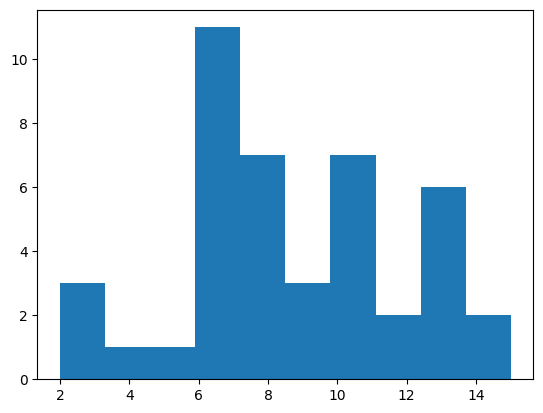

In [14]:
target["b_finalscore"].hist(grid=False)

In [ ]:
df = pd.merge(know,bel,how="left",on="d_time")
target = df[["d_time","k_finalscore","b_finalscore"]]


<Axes: xlabel='k_finalscore', ylabel='b_finalscore'>

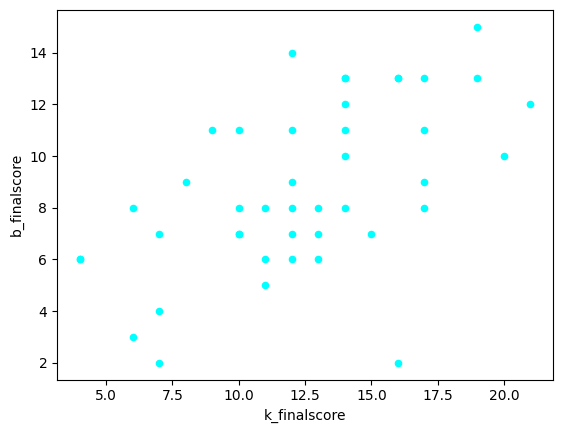

In [11]:
target.plot.scatter(x="k_finalscore",y="b_finalscore",c="cyan")

In [ ]:
sample = target["k_finalscore"].rank(method="min")
target["k_rank"] = sample
# target.sort_values("k_finalscore")
target.groupby("k_finalscore").count()

In [83]:
def cum_operations(row,method):
    inter = list(row)
    inter =sorted(inter)
    uniques = list(set(inter))
    length = len(inter)
    cums = {}
    for x in uniques:
        cums.update({x:inter.count(x)})
    #print(cums)
    keys = list(cums.keys())
    values = list(cums.values())
    #print(keys,values,sep="\n")
    result = []
    for i in range(len(uniques)+1):
        if i==0:
            pass
        else:
            subset = values[:i]
            result.append(sum(subset))
    #print(result,len(result),len(keys))
    final = {k:v for k,v in zip(keys,values)}
    #print(final)
    if method=="freq":
        return(final)
    else:
        return {k:v for k,v in zip(keys,[x/length for x in result])}






cum_operations(target["k_finalscore"],method="freq")
    

{4: 2, 6: 2, 7: 3, 8: 1, 9: 1, 10: 4, 11: 3, 12: 6, 13: 3, 14: 6, 15: 1, 16: 3, 17: 4, 19: 2, 20: 1, 21: 1}
[4, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 19, 20, 21]
[2, 2, 3, 1, 1, 4, 3, 6, 3, 6, 1, 3, 4, 2, 1, 1]
[2, 4, 7, 8, 9, 13, 16, 22, 25, 31, 32, 35, 39, 41, 42, 43] 16 16
{4: 2, 6: 2, 7: 3, 8: 1, 9: 1, 10: 4, 11: 3, 12: 6, 13: 3, 14: 6, 15: 1, 16: 3, 17: 4, 19: 2, 20: 1, 21: 1}


{4: 2,
 6: 2,
 7: 3,
 8: 1,
 9: 1,
 10: 4,
 11: 3,
 12: 6,
 13: 3,
 14: 6,
 15: 1,
 16: 3,
 17: 4,
 19: 2,
 20: 1,
 21: 1}